In [1]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

In [2]:
damier = imageio.imread("damier-ng.jpeg")
imageio.imsave("damier-ng.png", damier)

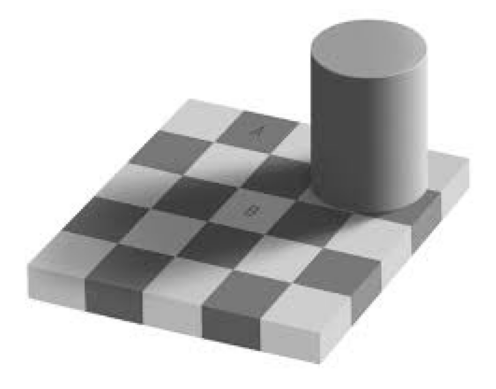

In [3]:
# Display the image using matplotlib
plt.imshow(damier,cmap="gray")
plt.axis('off')
plt.show()

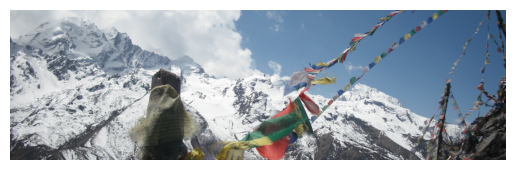

In [4]:
paysage = imageio.imread("paysage_zen.png")
plt.imshow(paysage)
plt.axis('off')
plt.show()

In [5]:
damier.shape

(198, 255, 3)

In [6]:
paysage.shape

(432, 1426, 3)

1. Modifier les pixels des bords de l’image de façon à créer un bord noir de k pixels
de largeur.

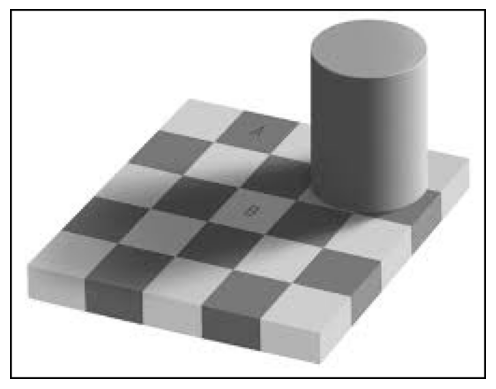

In [7]:

def bord(im,k):
    im_temp = im.copy()
    im_temp[:,:k] = 0
    im_temp[:,-k:] = 0
    im_temp[:k,:] = 0
    im_temp[-k:,:] = 0          
    return(im_temp)
plt.axis('off')
plt.imshow(bord(damier,1),cmap="gray")

2. Modifier l’image en inversant l’intensité des pixels. En particulier le blanc et le
noir seront inversés.

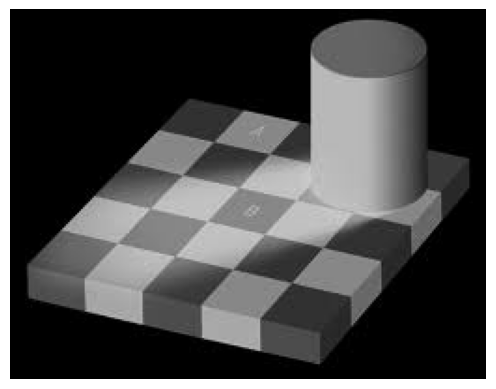

In [8]:
def inverse_intensity(im):
    im_temp = im.copy()
    im_temp = 255-im_temp    
    return(im_temp)
plt.axis('off')
plt.imshow(inverse_intensity(damier),cmap="gray")

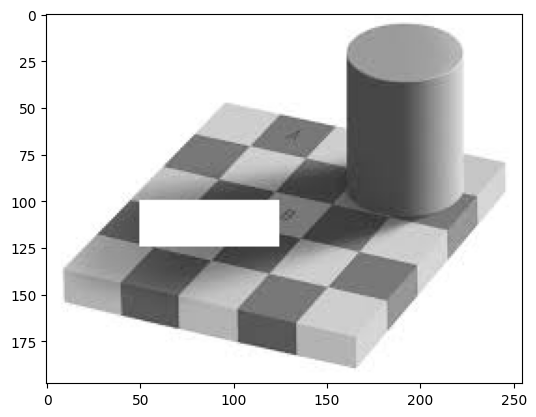

In [9]:
def masque(im,pos,lar,lon):
    im_temp = im.copy()
    im_temp[pos[0]:pos[0]+lon,pos[1]:pos[1]+lar] = 255
    return(im_temp)
plt.imshow(masque(damier,[100,50],75,25),cmap="gray")

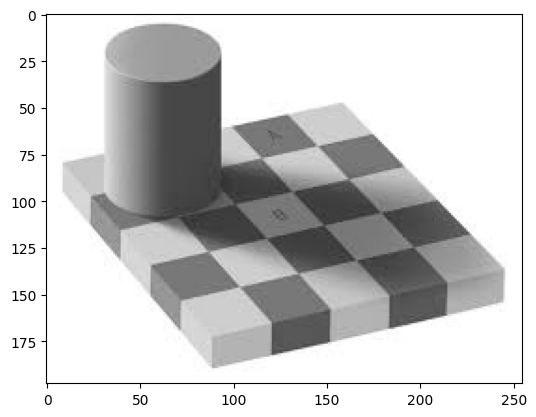

In [10]:
def flip(img, axis):    # axis = 0 for vertical 1 for horizontal
    img_flipped = np.flip(img, axis=axis)
    return img_flipped

plt.imshow(flip(damier, 1))

[[0.01 0.02 0.04 0.02 0.01]
 [0.02 0.04 0.08 0.04 0.02]
 [0.04 0.08 0.16 0.08 0.04]
 [0.02 0.04 0.08 0.04 0.02]
 [0.01 0.02 0.04 0.02 0.01]]


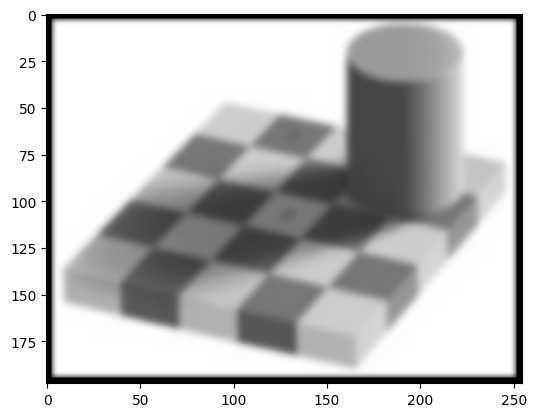

In [11]:
# Filtrer
 
K = np.array([[1,2,4,2,1],[2,4,8,4,2],[4,8,16,8,4],[2,4,8,4,2],[1,2,4,2,1]])/100.0
print(K)
def filtrer(im,K):
    im_temp = im.copy()*0 #Copier les dimensions de notre image sans 
    s = int((K.shape[0]+1)/2)
    for i in range(s,im.shape[0]-s):
        for j in range(s,im.shape[1]-s):
            im_temp[i,j] = np.sum(K*im[i-(s-1):i+s,j-(s-1):j+s])
    return(im_temp)
 
plt.imshow(filtrer(filtrer(filtrer(damier[:,:,0],K),K),K),cmap="gray")

La place rapprochée qui peut remplacer le chapeau mexicain

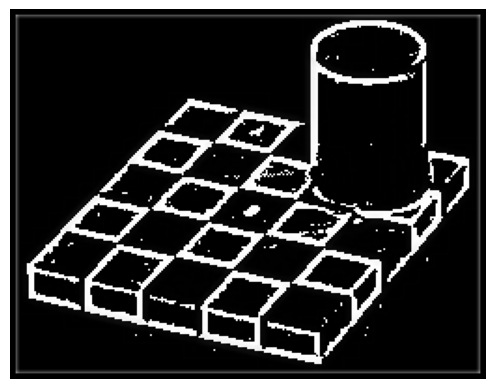

In [26]:
img_1 = filtrer(filtrer(damier[:,:,0],K),K)
img_2 = filtrer(damier[:,:,0],K)

img_dog = np.subtract(img_2, img_1)
plt.axis('off')
plt.imshow(img_dog,cmap="gray")